### Problem Statement:  Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.  

**Analysis to be done:** 

### The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings. 

***Data Dictionary***

* `App`: Application name
* `Category`: Category to which the app belongs 
* `Rating`: Overall user rating of the app
* `Reviews`: Number of user reviews for the app
* `Size`: Size of the app
* `Installs`: Number of user downloads/installs for the app
* `Type`: Paid or Free
* `Price`: Price of the app
* `Content Rating`: Age group the app is targeted at - Children / Mature 21+ / Adult
* `Genres`: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.
* `Last Updated`: Date when the app was last updated on Play Store
* `Current Ver`: Current version of the app available on Play Store
* `Android Ver`: Minimum required Android version


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###  Check for null values in the data. Get the number of null values for each column.

In [4]:
# missing value in data
data.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Drop records with nulls in any of the columns.

In [5]:
data.dropna(how='any',inplace=True)

In [6]:
data.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Variable formatting

**Creating a new column "Size_rev" in the DataFrame, which contains the last character of each value in the "Size" column after removing leading and trailing whitespace.Then retrieving the unique values from the "Size_rev" column.**

In [7]:
data["Size_rev"] = data["Size"].str.strip().str[-1]

data["Size_rev"].unique()

array(['M', 'e', 'k'], dtype=object)

In [8]:
data['Size']
# 'e' is from last word of 'varies with device'

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

**'change_size' function is to convert a string representation of a size value (e.g., "25M", "10k") into a numeric value. It handles cases where the size is specified in megabytes (M) or kilobytes (k) and returns the corresponding value in kilobytes. If the input does not match any of the expected formats, it returns None.The function is then applied to a column in a DataFrame.**

In [9]:
#handling this size field
def change_size(size):
    if 'M' in size:
        x=size[:-1]
        x= float(x)*1000
        return x
    elif 'k'==size[-1:]:
        x=size[:-1]
        x=float(x)
        return x
    else:
        return None
data['Size']=data['Size'].apply(change_size)

In [10]:
data['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

***the code replaces any missing values in the 'Size' column of the data DataFrame with the previous non-missing value in that column, effectively filling the missing values with the most recent known value.***

In [11]:
data.Size.fillna(method='ffill',inplace=True)

In [12]:
data['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839     3600.0
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [13]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_rev           object
dtype: object

***Reviews is a numeric field that is loaded as a string field. converting Reviews in integer***

In [14]:
data['Reviews']=data['Reviews'].astype('int')

In [15]:
data['Reviews'].dtype

dtype('int64')

***Installs field is currently stored as string and has values like 1,000,000+.***

***Treat 1,000,000+ as 1,000,000***

***remove ‘+’, ‘,’ from the field, convert it to integer***

In [16]:
data.Installs.value_counts()

Installs
1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

In [17]:
data['Installs'] = data['Installs'].str.replace('+','')

data['Installs'] = data['Installs'].str.replace(',','')

data['Installs'] = data['Installs'].astype(int)

In [18]:
data.Installs.value_counts()

Installs
1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: count, dtype: int64

***Price field is a string and has  sign dollar, and converting it to numeric***

In [19]:
data['Price']=data['Price'].str.replace('$','')
data['Price']=data['Price'].astype(float)

In [20]:
data.Price.describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [21]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_rev
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M


## Sanity Checks

***Average rating should be between 1 and 5 as only these values are allowed on the play store. Dropping the rows that have a value outside this range.***

In [22]:
data.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

***Min value of ratings is 1 and the max value is 5. As the ratings are within range,So we are not going to drop any value from dataframe.***

**Reviews should not be more than installs as only those who installed can review the app. If there are any such records,lets drop them.**

In [23]:
data[data.Reviews>data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_rev
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,M
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device,e
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,M
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up,M
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up,M
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up,M
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,M


In [24]:
data1=data[data.Reviews <= data.Installs].copy()

In [25]:
data1.shape

(9353, 14)

**So data1 is my main dataset for usage as it contains the information of only those apps which do not have 
suspicious reviews**

**For free apps (type = “Free”), the price should not be >0. Drop any such rows.**

In [26]:
len(data[(data.Type=="Free")&(data.Price>0)])

0

**No such 'free' app for which a price is charged**

## Performing univariate analysis:

**Boxplot for Price**

<function matplotlib.pyplot.show(close=None, block=None)>

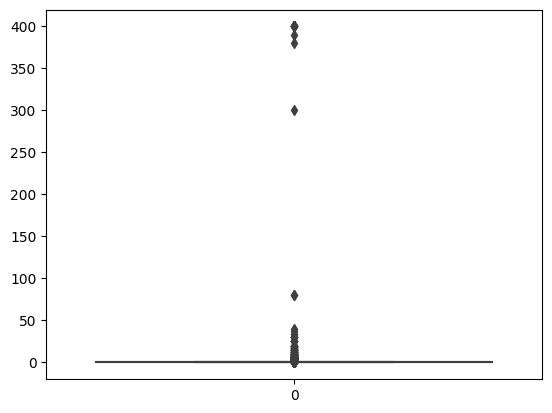

In [27]:
sns.boxplot(data1.Price)
plt.show

***Price: From the box plot, it seems like there are some apps with very high price. A price of 200 dollar for an application on the Play Store is very high and suspicious!***

**Boxplot for Reviews**

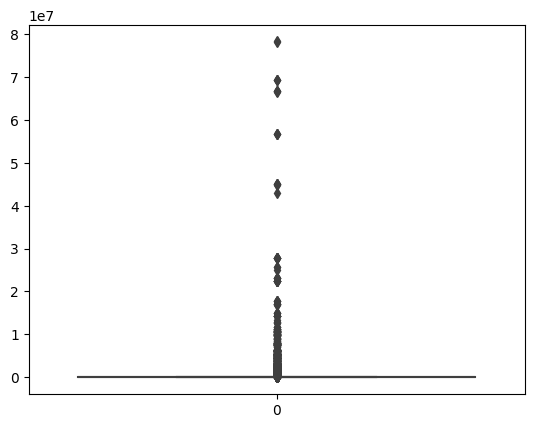

In [28]:
sns.boxplot(data1.Reviews)
plt.show()

***Very few apps have very high number of reviews***

**Histogram for Rating**

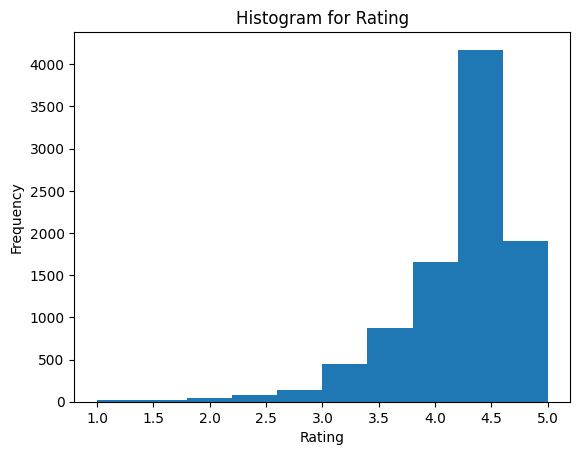

In [29]:
data1['Rating'].plot.hist()

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram for Rating')
plt.show()

***Rating is positively skewed***

**Histogram of Size**

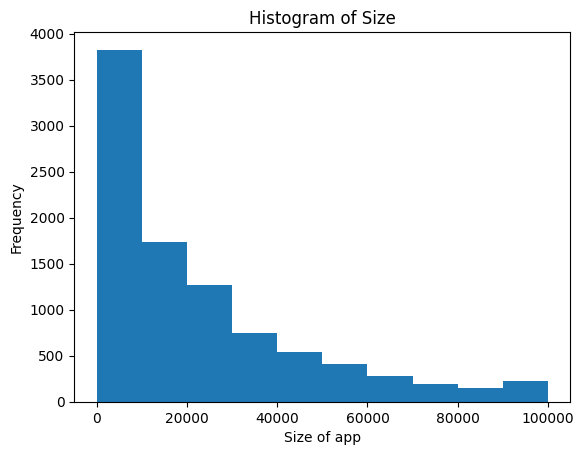

In [30]:
data['Size'].plot.hist()
plt.xlabel('Size of app')
plt.ylabel('Frequency')
plt.title('Histogram of Size')
plt.show()

***Size is Negatively skewed***

## Outlier Treatment

**function vijay to remove outliers from the specified column (age) in the DataFrame data. After removing the outliers, it applies an additional filter to keep only the rows where the 'Price' column values are less than 200.**

In [31]:
# defining fuction for outliers
def vijay(data1,age):
    Q1 = data1[age].quantile(0.25)
    Q3 = data1[age].quantile(0.75)
    IQR = Q3-Q1
    data1 = data1.loc[~((data1[age]<(Q1-1.5*IQR))|(data1[age]>(Q3+1.5*IQR))),]
    return data1

data1 = data1.loc[data1['Price']<200,]


<Axes: >

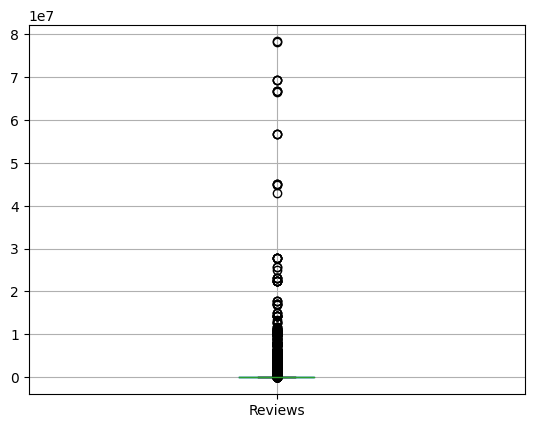

In [32]:
# calling function vijay
data1.boxplot(column=['Reviews'])

In [33]:
data1 = vijay(data1,'Size')

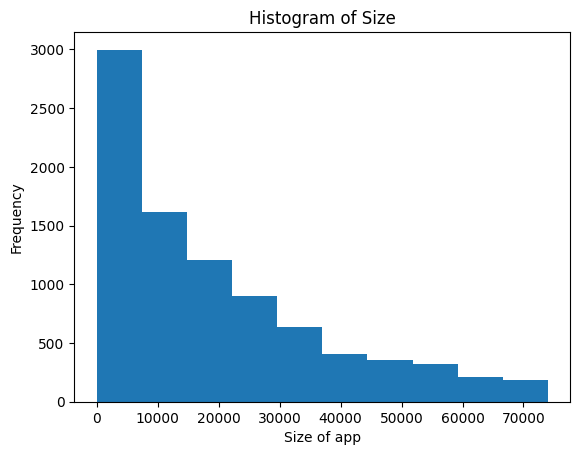

In [34]:
plt.hist(data1['Size'])
plt.xlabel('Size of app')
plt.ylabel('Frequency')
plt.title('Histogram of Size')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

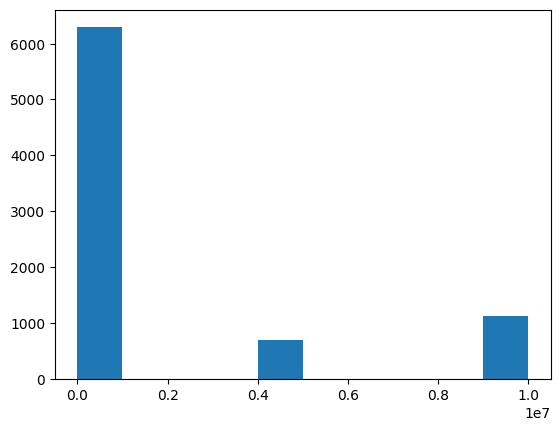

In [35]:
data1=vijay(data1,'Installs')
plt.hist(data1['Installs'])
plt.show

***we need to redifine threshold limit for Installs***

In [36]:
Q1=data1['Installs'].quantile(0.10)
Q2=data1['Installs'].quantile(0.25)
Q3=data1['Installs'].quantile(0.50)
Q4=data1['Installs'].quantile(0.70)
Q5=data1['Installs'].quantile(0.90)
Q6=data1['Installs'].quantile(0.95)
Q7=data1['Installs'].quantile(0.99)
print('Q1 :',Q1)
print('Q2 :',Q2)
print('Q3 :',Q3)
print('Q4 :',Q4)
print('Q5 :',Q5)
print('Q6 :',Q6)
print('Q7 :',Q7)

Q1 : 1000.0
Q2 : 10000.0
Q3 : 100000.0
Q4 : 1000000.0
Q5 : 10000000.0
Q6 : 10000000.0
Q7 : 10000000.0


In [37]:
def ajay(data1,Installs):
    Q1=data1[Installs].quantile(0.10)
    Q2=data1[Installs].quantile(0.25)
    Q3=data1[Installs].quantile(0.50)
    Q4=data1[Installs].quantile(0.70)
    Q5=data1[Installs].quantile(0.90)
    Q6=data1[Installs].quantile(0.95)
    Q7=data1[Installs].quantile(0.99)
    IQR = Q5-Q3
    data1 = data1.loc[~((data1[Installs]<(Q3-1.5*IQR))|(data1[Installs]>(Q5+1.5*IQR))),]
    return data1
data1 = data1.loc[data1['Installs']>100000,]


<function matplotlib.pyplot.show(close=None, block=None)>

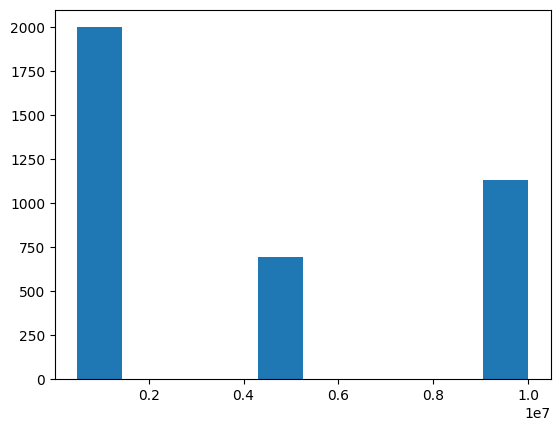

In [38]:
data1=ajay(data1,'Installs')
plt.hist(data1['Installs'])
plt.show

## Bivariate analysis:

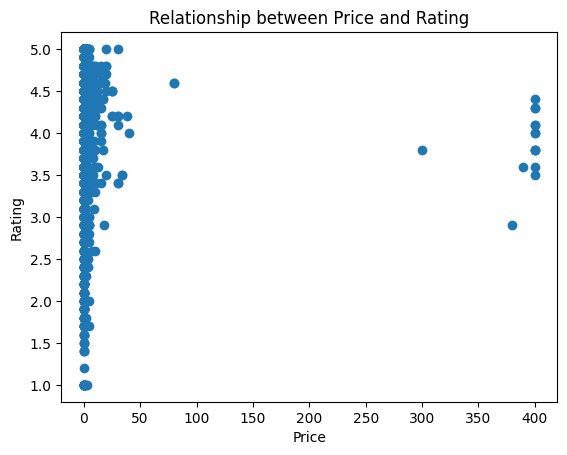

In [39]:
# Scatter plot
plt.scatter(data['Price'],data['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Relationship between Price and Rating')
plt.show()
# very few products are there with more than 60

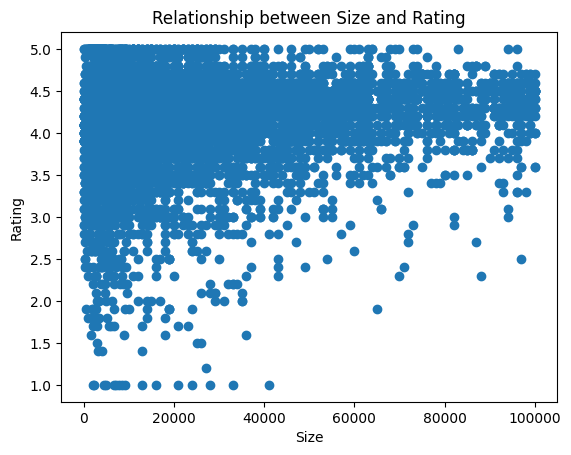

In [40]:
plt.scatter(data['Size'],data['Rating'])
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Relationship between Size and Rating')
plt.show()
# evenly distriduted

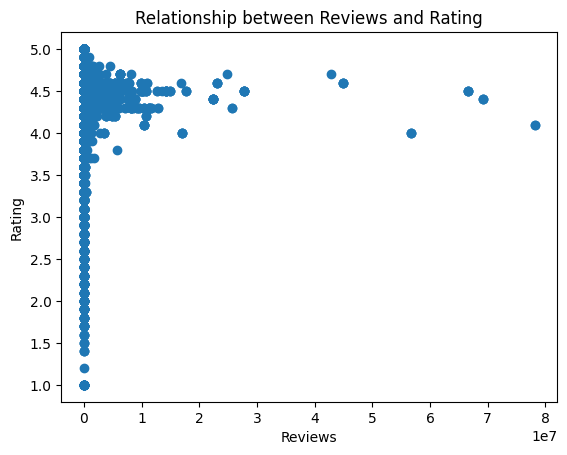

In [41]:
plt.scatter(data['Reviews'],data['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Relationship between Reviews and Rating')
plt.show()

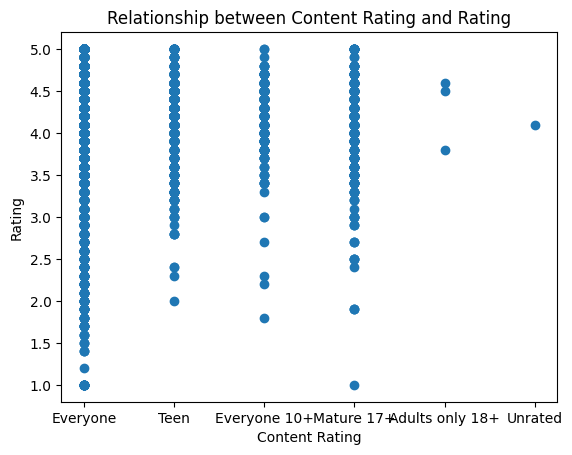

In [42]:
plt.scatter(data['Content Rating'],data['Rating'])
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Relationship between Content Rating and Rating')
plt.show()
# most of the content Rating prefers high rating apps

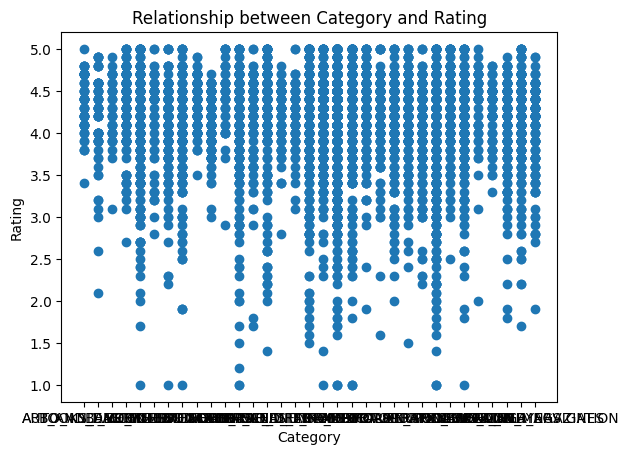

In [43]:
plt.scatter(data['Category'],data['Rating'])
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Relationship between Category and Rating')
plt.show()

In [44]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_rev
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,M


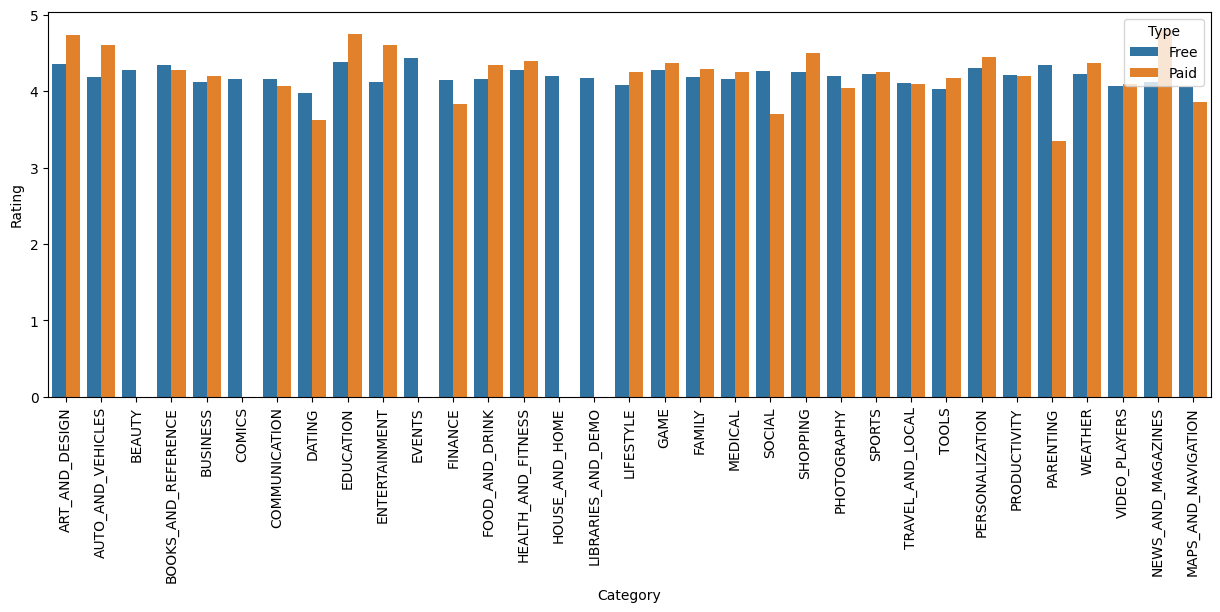

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='Category',y='Rating',dodge=True,errorbar=None,estimator=np.mean,hue='Type')
plt.xticks(rotation=90)
plt.show()

### Q8. Data preprocessing

## backup copy for the data

***By applying the logarithm transformation, it is often possible to achieve a more symmetric distribution of data and reduce the impact of extreme values.***

In [54]:
backup=data.copy()

In [55]:
import numpy as np
backup['Reviews']=np.log(backup['Reviews'])
backup['Installs']=np.log(backup['Installs'])

In [56]:
backup.drop(['App','Last Updated','Current Ver','Android Ver','Size_rev'],axis=1,inplace=True)

In [57]:
backup.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.068904,19000.0,9.210340,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.874198,14000.0,13.122363,Free,0.0,Everyone,Art & Design;Pretend Play


In [58]:
backup1=pd.get_dummies(data=backup,columns=['Category','Content Rating','Genres','Type'],drop_first=True)

In [59]:
backup1.head(2)

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Type_Paid
0,4.1,5.068904,19000.0,9.210340,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,6.874198,14000.0,13.122363,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
x=backup1.drop('Rating',axis=1)
y=backup1.loc[:,'Rating']
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=123)


In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [62]:
print(f'r square value: {lr.score(train_x,train_y)}')

r square value: 0.17438443550071137


In [63]:
pridict_y=lr.predict(test_x)

In [64]:
d = pd.DataFrame()
d['test_y']=test_y
d['pridict_y']=pridict_y
d['mp']=abs((d['test_y']-d['pridict_y']/d['test_y']))
(d.mp.mean())*100

316.784181007341

In [65]:
print(f'r square value :{lr.score(test_x,test_y)}')

r square value :0.13785137235513767


### Conclusion

***The R Square is pretty low, But MAPE is quite high.***